# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw9.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [33]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML

5. Now that we are in the desired location, we can unzip the compressed file.

  **Note that this step needs to be done only once**

In [ ]:
!unzip hw9.zip

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

plt.style.use('seaborn-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-34-31d407800f8e>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


# K-Means

Explore the visualization of the K-means algorithm at [this website](https://www.naftaliharris.com/blog/visualizing-k-means-clustering).

Note that you must click on the buttons `Update Centroids` and `Reassign Points` multiple times, until convergence (until there are no changes in the contents of clusters).

For example, at this website run K-means on the `Uniform dataset` initializing with `K=4` randomly chosen cluster centers.

**Problem1.(5 points)** Try to cluster the `Smiley Face` dataset on the same website by choosing initial cluster centers manually.

Is it possible to choose the centers such that there would be `one cluster` which only contains the `left eye` of the smiley?

**Answer:**

**Problem2. (10 points)** Complete the `KMeans` algorithm in `clustering.py` script and use it to find `2, 3` and `4` clusters on the toy data defined below.

In [35]:
from clustering import KMeans

In [36]:
data = pd.DataFrame(
    {'ID':['P1','P2','P3','P4','P5','P6','P7','P8','P9'],
    'x':[0,1,4,2,0,1,3,7,6],
    'y':[1,1,0,3,5,6,6,4,8]})
data

,ID,x,y
0,P1,0,1
1,P2,1,1
2,P3,4,0
3,P4,2,3
4,P5,0,5
5,P6,1,6
6,P7,3,6
7,P8,7,4
8,P9,6,8


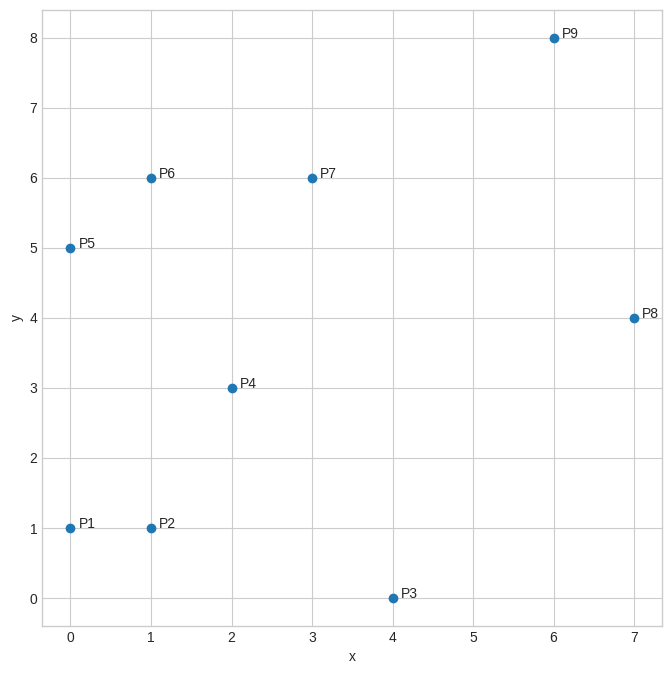

In [37]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')

# adding text next to the points
for i, label in enumerate(data['ID']):
    x = data['x'][i]+0.1
    y = data['y'][i]
    plt.annotate(label,(x,y))

In [38]:
def plot_data(X, model):
  """
  Helper function to plot the data points
  in the toy dataset and also plots the centroids
  using the fitted model
  """
  plt.figure(figsize=(8, 6))
  for i in range(model.k):
    plt.scatter(data.loc[model.labels == i, 'x'],
             data.loc[model.labels == i, 'y'],
             marker='o' , label=f'{i}')
    plt.plot(model.centroids[i][0],
             model.centroids[i][1],
             marker='*', markersize=12)

  # adding text next to the points
  for i, label in enumerate(data['ID']):
    x = data['x'][i]+0.1
    y = data['y'][i]
    plt.annotate(label,(x,y))

  plt.legend()
  plt.show()

For each number of clusters ($K$) run the algorithm several times and plot the results, to see how whether the clusters differ during each run.

Converged in 4 steps


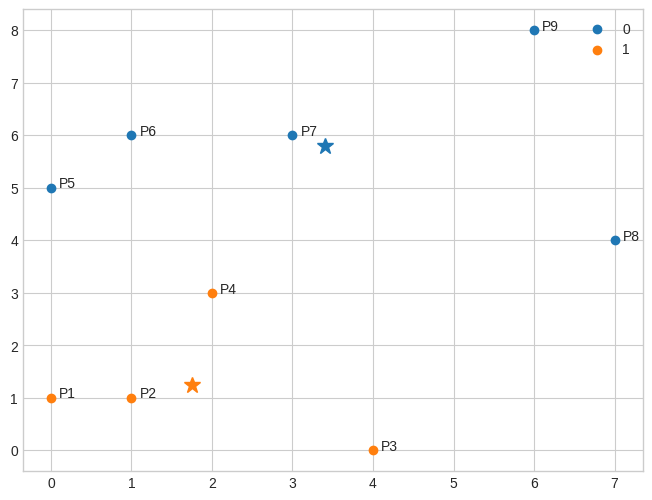

In [39]:
model = KMeans(k=2, tol=0.001)
model.fit(data[['x', 'y']])
plot_data(data, model)

Converged in 4 steps


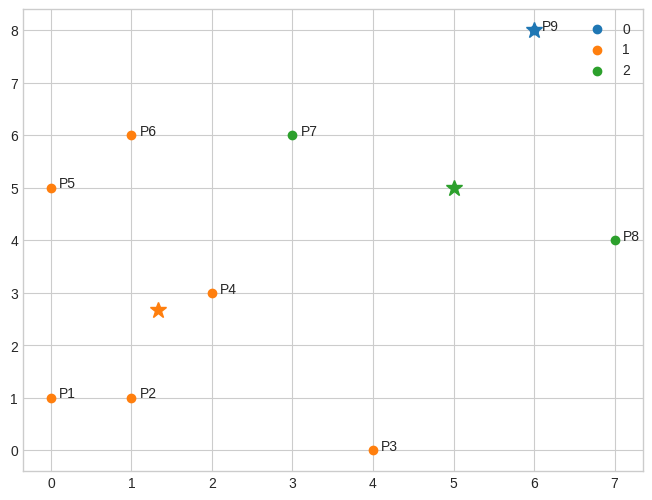

In [40]:
model = KMeans(k=3, tol=0.001)
model.fit(data[['x', 'y']])
plot_data(data, model)

Converged in 4 steps


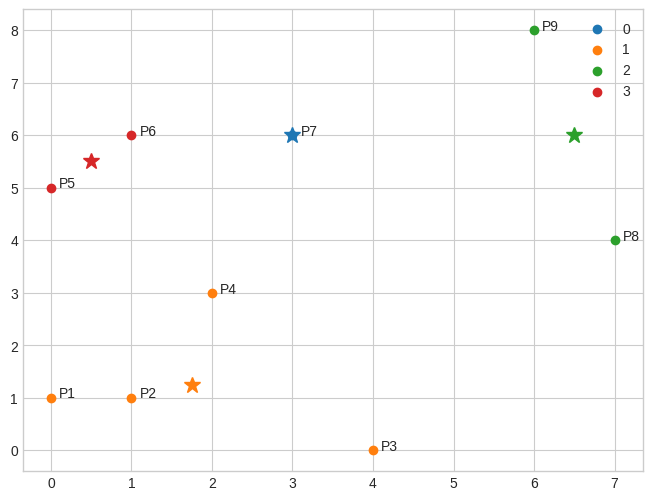

In [41]:
model = KMeans(k=4, tol=0.001)
model.fit(data[['x', 'y']])
plot_data(data, model)

**Question:** What happened when you executed the algorithm for several times for each of the cases?

**Answer:**

# Hierarchical Clustering

**Problem3. (5 points)** Perform hierarchical clustering of the toy dataset introduced above. Calculate distances between instances using Euclidean distance in the 2-dimensional space determined by features `x` and `y`. For calculating distances between clusters use `single linkage` method. Each time when you merge two clusters (even if they consist of only a single instance) report the following

* List of instance IDs in one cluster
* List of instance IDs in the other cluster
* Distance between these clusters

Sometimes there can be alternatives with the same distances, in such case just decide randomly which of the alternatives to choose. Do this steps manually on paper (without programming) take a photo of the work and attach it with this homework.

For example, the first three clusters will be

$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2} \approx 1.41$$
$$[P5,P6] + [P7] \ \rightarrow \   d=\sqrt{(1-3)^2+(6-6)^2}=\sqrt{4} = 2$$

Continue forming the clusters.



**Problem4: (5 points)**  After finishing the above, do the same with `complete linkage` method and report the results similarly.

In this case the first three clusters will be

$$[P1] + [P2] \ \rightarrow \   d=\sqrt{(0-1)^2+(1-1)^2}=\sqrt{1}=1$$
$$[P5] + [P6] \ \rightarrow \   d=\sqrt{(0-1)^2+(5-6)^2}=\sqrt{2} \approx 1.41$$
$$[P2,P1] + [P4] \ \rightarrow \   d=\sqrt{(0-2)^2+(1-3)^2}=\sqrt{8} \approx 2.83$$

Continue forming the clusters.

Now we will draw the dendrograms of both clusterings.

The code for drawing a dendrogram of the clustering from the Task 1 and 2 are written below. You can also check your answers in those tasks with the resulting dendrograms.


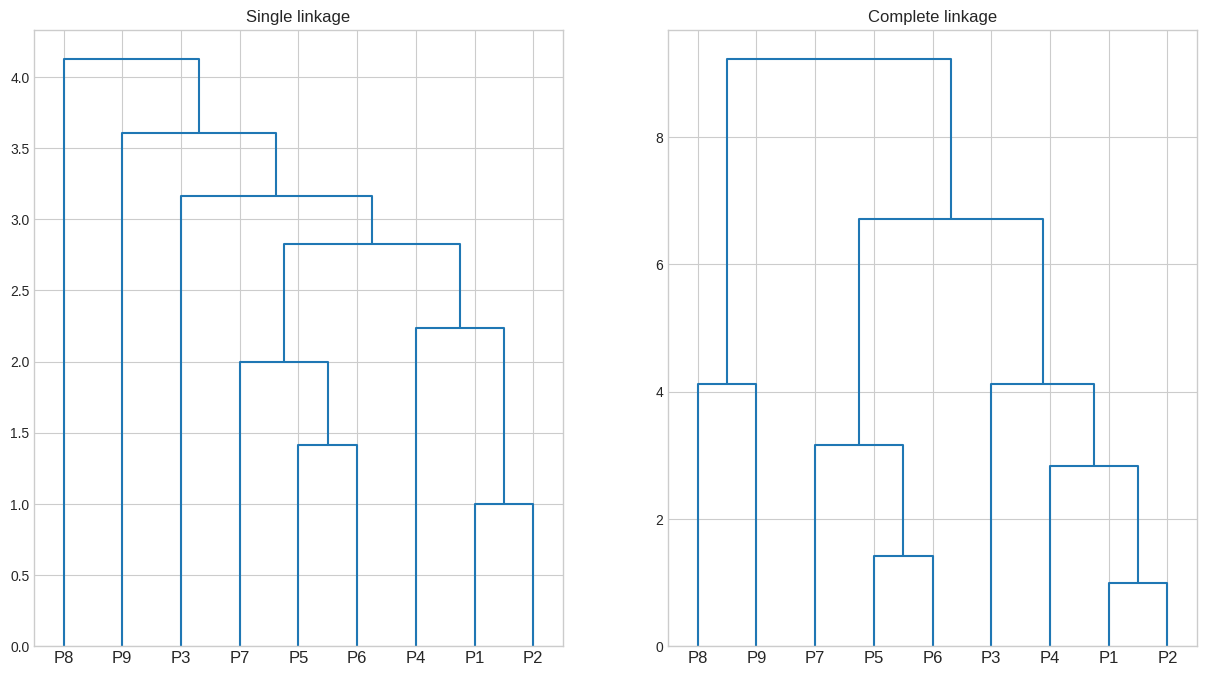

In [42]:
from scipy.cluster import hierarchy
plt.rcParams['figure.figsize'] = [15, 8]

single = hierarchy.linkage(data[['x','y']], 'single')
plt.subplot(1,2,1)
plt.title('Single linkage')
single_dm = hierarchy.dendrogram(single, labels=data.ID.tolist(), color_threshold=0)

complete = hierarchy.linkage(data[['x','y']], 'complete')
plt.subplot(1,2,2)
plt.title('Complete linkage')
complete_dm = hierarchy.dendrogram(complete, labels=data.ID.tolist(), color_threshold=0)

plt.show()

**Problem5. (5 points)** For this task you should

* find a subcluster in the single linkage dendrogram such that none of the subclusters in the complete linkage dendrogram consists of exactly the same set of instances.

* find a subcluster in the complete linkage dendrogram such that none of the subclusters in the single linkage dendrogram consists of exactly the same set of instances.


**Answer:**

**Problem6. (10 points)** Complete the `HierarchicalClustering` algorithm in `clustering.py` script and show that you are getting the same result as above (you don't have to draw a dendrogram).

In [49]:
from clustering import HierarchicalClustering

def euclidean(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

model = HierarchicalClustering(nr_clusters=2, diss_func=euclidean, linkage='single')
single = model.fit(data[['x', 'y']])


In [50]:
single_dm = hierarchy.dendrogram(single, labels=data.ID.tolist(), color_threshold=0)

IndexError: ignored

**Problem7. (10 points)** Implement the `DBSCAN` algorithm in `clustering.py` script and run it on the same toy example with different hyperparameters.

In [ ]:
# YOUR CODE HERE